In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
hd = pd.read_csv('https://raw.githubusercontent.com/sonarsushant/California-House-Price-Prediction/refs/heads/master/housing.csv')

In [3]:
hd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
hd.shape

(20640, 10)

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
hd.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
hd['total_bedrooms'].mode()

0    280.0
Name: total_bedrooms, dtype: float64

In [8]:
hd.fillna(hd['total_bedrooms'].mode()[0],inplace=True)

In [9]:
hd.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
hd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
hd.drop(columns=['ocean_proximity'],index=1, inplace=True)

In [12]:
hd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0


# Train, test, split

In [13]:
X = hd.iloc[::,:-1]

In [14]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368


In [15]:
y = hd.iloc[::,-1]

In [16]:
y.head()

0    452600.0
2    352100.0
3    341300.0
4    342200.0
5    269700.0
Name: median_house_value, dtype: float64

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=50)

In [18]:
X_train.shape

(16511, 8)

In [19]:
y_train.shape

(16511,)

In [20]:
X_test.shape # -------> y pred

(4128, 8)

In [21]:
y_test.shape

(4128,)

# Feature sculling 

In [22]:
scalar = StandardScaler()

In [23]:
X_train_Scaled = scalar.fit_transform(X_train)

In [24]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4451,-118.21,34.06,29.0,1478.0,413.0,1580.0,394.0,1.8781
11732,-120.69,39.12,19.0,1048.0,262.0,493.0,184.0,2.2917
15338,-117.29,33.20,16.0,2150.0,461.0,1428.0,407.0,2.4754
18156,-122.06,37.36,35.0,2693.0,493.0,1343.0,455.0,6.0777
16284,-121.28,37.93,23.0,1491.0,346.0,1223.0,343.0,2.1591


In [25]:
X_train_Scaled

array([[ 0.6756696 , -0.73456766,  0.03077157, ...,  0.13721601,
        -0.27855686, -1.05435855],
       [-0.5596802 ,  1.62993889, -0.76283876, ..., -0.82765938,
        -0.83082217, -0.83598996],
       [ 1.13394452, -1.13644031, -1.00092186, ...,  0.00229323,
        -0.24436901, -0.73900178],
       ...,
       [ 0.82510707, -0.79531585, -0.6041167 , ..., -0.19387738,
        -0.39426959,  1.25134129],
       [ 0.64080085, -0.85606404,  0.74502086, ..., -0.19387738,
        -0.43371712,  0.06594199],
       [ 1.13394452, -0.49624783, -0.52475566, ..., -0.88535662,
        -0.68618126, -1.38344254]])

In [26]:
X_test_Scalar = scalar.transform(X_test)

In [27]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1946,-120.91,38.73,11.0,5460.0,859.0,2645.0,838.0,4.8350
10948,-117.87,33.75,14.0,5526.0,1916.0,6799.0,1796.0,2.6561
13915,-116.09,34.15,13.0,9444.0,1997.0,4166.0,1482.0,2.6111
13396,-117.57,34.02,5.0,6933.0,1311.0,3845.0,1285.0,4.6727
9787,-120.79,36.06,29.0,1916.0,386.0,1019.0,314.0,2.4881


In [28]:
X_test_Scalar

array([[-0.66926768,  1.44769431, -1.39772702, ...,  1.0825631 ,
         0.88908979,  0.50679733],
       [ 0.84503207, -0.87942873, -1.15964393, ...,  4.76986058,
         3.40847154, -0.64359752],
       [ 1.73169442, -0.69251122, -1.23900496, ...,  2.43267853,
         2.58270341, -0.66735619],
       ...,
       [ 0.76035083, -0.89344755, -0.3660336 , ...,  1.76871644,
         2.01991876,  0.41698956],
       [ 0.70057584, -0.44484551, -0.92156083, ...,  0.12922716,
         0.51302342, -0.67839077],
       [-1.43638005,  0.98040053,  1.85607532, ..., -0.24181047,
        -0.24436901,  0.65927521]])

# Build model

In [30]:
model = LinearRegression()

In [31]:
model.fit(X_train_Scaled,y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test_Scalar)

In [34]:
y_pred

array([136539.65518889, 132608.50716713,  92986.21556878, ...,
       265643.15189691, 154206.33412389, 312582.92501204])

# Model Performance

In [36]:
mse = mean_squared_error(y_test, y_pred)   # cost function pridita valus - achival vaules

In [37]:
mse

4909552937.12312

In [38]:
r2 = r2_score(y_test, y_pred)

In [39]:
r2

0.6269607381000207

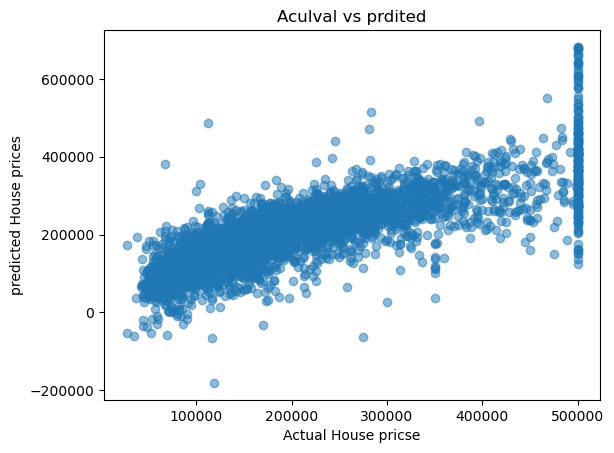

In [42]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual House pricse')
plt.ylabel('predicted House prices')
plt.title('Aculval vs prdited')
plt.show()